## Visitar https://spacy.io/

In [ ]:
%pip install spacy

In [ ]:
%python -m spacy download es_core_news_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.9/12.9 MB 48.8 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('es_core_news_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


##Creacion Database



In [ ]:
# import pandas as pd
# import random

# # --- 1. Definición de Parámetros ---
# NUM_ENTRIES = 1500  # Puedes cambiar esto a 1000 o 2000
# FILE_NAME = "Datos.csv"

# # --- 2. Listas de Componentes (Basado en el Escenario) ---

# # Columnas Requeridas
# SOURCES = ['Amazon', 'ForoX', 'Twitter', 'CustomerService']
# PRODUCTS = ['Auriculares TecnoGadget', 'Competidor A', 'Competidor B']

# # Listas de fragmentos para construir reseñas (para los 3 desafíos)

# # Desafío 1: Rediseño de Producto (Características) [cite: 27]
# FEATURES_POS = [
#     "la calidad de sonido", "la cancelación de ruido", "la duración de la batería",
#     "el diseño", "la comodidad", "la conexión bluetooth"
# ]
# FEATURES_NEG = [
#     "el micrófono", "la calidad del material", "el sensor de ritmo cardíaco",
#     "la conectividad", "la app", "el estuche de carga"
# ]

# # Desafío 2: Servicio al Cliente (Quejas) [cite: 28]
# SERVICE_COMPLAINTS = [
#     "el soporte no responde", "llevo 3 semanas esperando un reemplazo",
#     "el agente no sabía nada", "el chat se desconectó", "no me quieren dar reembolso",
#     "pésimo servicio al cliente", "nunca me llegó el paquete"
# ]

# # Desafío 3: Análisis Competitivo [cite: 29]
# COMPARISONS_POS = [
#     "es mucho mejor que el [COMPETIDOR]", "supera al [COMPETIDOR] en calidad",
#     "mil veces mejor que [COMPETIDOR]", "el [COMPETIDOR] no le llega ni a los talones"
# ]
# COMPARISONS_NEG = [
#     "es peor que el [COMPETIDOR]", "me arrepiento, debí comprar el [COMPETIDOR]",
#     "no vale la pena por el precio, el [COMPETIDOR] es más barato",
#     "la batería dura menos que la del [COMPETIDOR]"
# ]

# # Fragmentos genéricos para dar variedad [cite: 42]
# GENERIC_POS = ["¡Increíble!", "Totalmente recomendado.", "Lo mejor que he comprado.", "5 estrellas.", "Muy feliz con la compra."]
# GENERIC_NEG = ["Qué decepción.", "No lo compren.", "Una estafa total.", "Pésimo producto.", "Dinero tirado a la basura.", "👎"]
# GENERIC_NEU = ["Es un producto promedio.", "Ni bueno ni malo.", "Cumple con lo justo.", "Hay mejores opciones.", "Meh."]

# # --- 3. Plantillas de Escenarios (Combinando todo) ---
# # (Plantilla de texto, Rating)

# SCENARIOS = [
#     # Positivos (Rating 4-5)
#     ("[FEATURE_POS] es [ADJ_POS]. [CONCLUSION_POS]", 5),
#     ("Me encanta [FEATURE_POS], [COMP_POS].", 4),
#     ("Muy buen producto. [FEATURE_POS] es genial, aunque [FEATURE_NEG] podría mejorar.", 4),
#     ("Wow! #[PRODUCTO] [ADJ_POS]! 🔥 [CONCLUSION_POS]", 5),

#     # Neutrales (Rating 3)
#     ("[CONCLUSION_NEU] [FEATURE_POS] está bien, pero [FEATURE_NEG] es un problema.", 3),
#     ("Es un dispositivo decente por el precio. [COMP_NEG].", 3),
#     ("Meh. #[PRODUCTO] funciona, pero nada espectacular.", 3),

#     # Negativos (Rating 1-2)
#     ("Un desastre. [FEATURE_NEG] es [ADJ_NEG]. [CONCLUSION_NEG]", 1),
#     ("[FEATURE_NEG] dejó de funcionar al segundo día. [COMP_NEG].", 2),
#     ("No compren #[PRODUCTO]. [ADJ_NEG]. [CONCLUSION_NEG] 👎", 1),
# ]

# # Escenario específico para Servicio al Cliente
# SERVICE_SCENARIO = ("Llevo [TIEMPO] y [QUEJA_SERVICIO]. [CONCLUSION_NEG].", 1)

# # --- 4. Lógica de Generación ---

# data_rows = []
# print(f"Generando {NUM_ENTRIES} entradas simuladas...")

# for i in range(1, NUM_ENTRIES + 1):
#     row = {}
#     row['ID'] = f"REV-{i:04d}" # Formato REV-0001
#     row['Source'] = random.choice(SOURCES)
#     row['Product'] = random.choice(PRODUCTS) # El producto principal de la reseña

#     # Elegir un competidor (que no sea el producto principal)
#     competitor = random.choice([p for p in PRODUCTS if p != row['Product']])

#     text = ""
#     rating = 0

#     # Lógica para Servicio al Cliente
#     if row['Source'] == 'CustomerService':
#         template, rating = SERVICE_SCENARIO
#         text = template.replace("[QUEJA_SERVICIO]", random.choice(SERVICE_COMPLAINTS))
#         text = text.replace("[TIEMPO]", random.choice(["2 semanas", "un mes", "5 llamadas"]))
#         text = text.replace("[CONCLUSION_NEG]", random.choice(GENERIC_NEG))
#         row['Rating'] = rating # Rating 1 para servicio

#     # Lógica para otras fuentes (Twitter, Amazon, ForoX)
#     else:
#         template, rating = random.choice(SCENARIOS)
#         row['Rating'] = rating

#         # Rellenar plantillas
#         text = template.replace("[FEATURE_POS]", random.choice(FEATURES_POS))
#         text = text.replace("[FEATURE_NEG]", random.choice(FEATURES_NEG))
#         text = text.replace("[ADJ_POS]", random.choice(["genial", "increíble", "brutal"]))
#         text = text.replace("[ADJ_NEG]", random.choice(["pésimo", "horrible", "un desastre"]))
#         text = text.replace("[COMP_POS]", random.choice(COMPARISONS_POS))
#         text = text.replace("[COMP_NEG]", random.choice(COMPARISONS_NEG))
#         text = text.replace("[CONCLUSION_POS]", random.choice(GENERIC_POS))
#         text = text.replace("[CONCLUSION_NEG]", random.choice(GENERIC_NEG))
#         text = text.replace("[CONCLUSION_NEU]", random.choice(GENERIC_NEU))
#         text = text.replace("[PRODUCTO]", row['Product'].split(" ")[-1]) # ej: "TecnoGadget" o "A"
#         text = text.replace("[COMPETIDOR]", competitor)

#         # Lógica para Twitter (textos más cortos)
#         if row['Source'] == 'Twitter':
#             text = " ".join(text.split(" ")[:random.randint(5, 12)]) # Acortar el texto

#     row['CommentText'] = text
#     data_rows.append(row)

# # --- 5. Guardar en CSV ---
# df_final = pd.DataFrame(data_rows)
# df_final.to_csv(FILE_NAME, index=False, quoting=1) # quoting=1 es csv.QUOTE_ALL

# print(f"¡Éxito! Archivo '{FILE_NAME}' con {len(df_final)} filas ha sido creado.")
# print("\nPrimeras 5 filas generadas:")
# print(df_final.head())

## Procesamiento Constitución


--- 20 Most Frequent Words (BEFORE Preprocessing) ---
de: 397
el: 219
no: 209
la: 166
muy: 164
batería: 163
se: 150
pero: 144
sonido: 128
para: 121
precio: 120
son: 119
calidad: 114
excelente: 106
al: 103
ruido: 102
los: 100
cómodos: 92
cancelación: 91
graves: 88


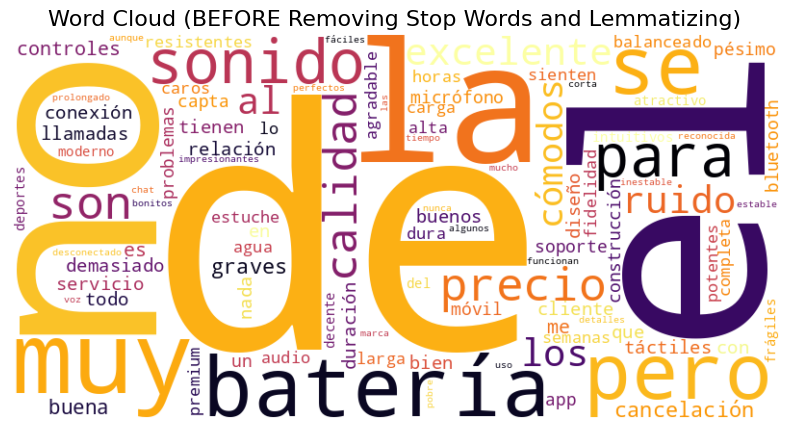

In [3]:
import pandas as pd
import re
from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import WordCloud # Import WordCloud here


# 1. Cargar el dataset correctamente
try:
    df = pd.read_csv('Datos.csv')
except FileNotFoundError:
    print("El archivo 'Datos.csv' no fue encontrado.")
    # Si este error persiste, asegúrese de que el archivo esté en la carpeta de trabajo.

# Columna con el texto original
TEXT_COLUMN = 'Texto_Comentario'

# Función de limpieza mínima (only punctuation and lowercase)
def minimal_clean(text):
    text = str(text).lower()
    # Remove punctuation, keeping spaces to separate words
    text = re.sub(r'[^\w\s]', ' ', text)
    # Remove numbers (as they don't contribute semantic value)
    text = re.sub(r'\d+', ' ', text)
    return text.strip()

# Aplicar la limpieza mínima y tokenizar
all_raw_tokens = []
for comment in df[TEXT_COLUMN]: # Use df_final instead of df
    cleaned_comment = minimal_clean(comment)
    # Separate by spaces
    tokens = [token for token in cleaned_comment.split() if len(token) > 1]
    all_raw_tokens.extend(tokens)

# Count word frequency
raw_word_freq = Counter(all_raw_tokens)

# Filter by minimum frequency of 20
min_freq = 20
filtered_raw_freq = {word: freq for word, freq in raw_word_freq.items() if freq >= min_freq}

# Display results
print("\n--- 20 Most Frequent Words (BEFORE Preprocessing) ---")
top_20_raw = sorted(filtered_raw_freq.items(), key=lambda x: x[1], reverse=True)[:20]
for word, freq in top_20_raw:
    print(f"{word}: {freq}")

# Generate the word cloud with filtered words (only lowercase and no punctuation)
if filtered_raw_freq:
    wordcloud = WordCloud(
        width=800,
        height=400,
        background_color='white',
        colormap='inferno', # Changed color to differentiate
        max_words=100
    ).generate_from_frequencies(filtered_raw_freq)

    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title('Word Cloud (BEFORE Removing Stop Words and Lemmatizing)', fontsize=16)
    plt.show()

## Procesamiento de opinión de clientes

In [ ]:
import pandas as pd
import spacy
from spacy.lang.es.stop_words import STOP_WORDS
from collections import Counter
import string
import unicodedata

# Cargar el modelo de spaCy para español
nlp = spacy.load("es_core_news_sm")

# Leer el archivo CSV con manejo de comillas
df = pd.read_csv("Datos.csv", delimiter=',', quotechar='"', doublequote=True, escapechar='\\')

# Mostrar información básica del dataset
print("Información del dataset:")
print(f"Número de filas: {len(df)}")
print(f"Número de columnas: {len(df.columns)}")
print("\nColumnas:", df.columns.tolist())
print("\nPrimeras filas:")
print(df.head())

# Procesar los comentarios (Texto_Comentario)
def preprocess_text(text):
    if pd.isna(text):
        return []

    # Normalizar caracteres a ASCII
    text = unicodedata.normalize('NFD', text).encode('ascii', errors='ignore').decode('utf-8')

    # Procesar el texto con spaCy
    doc = nlp(text)

    # Obtener palabras vacías personalizadas
    with open("stopwords.es", encoding="utf-8") as f:
        custom_stopwords = set(line.strip() for line in f)

    # Procesar tokens
    processed_tokens = []
    for token in doc:
        # Convertir a minúsculas y verificar condiciones
        if (not token.is_stop and  # No es palabra vacía de spaCy
            token.text.lower() not in custom_stopwords and  # No es palabra vacía personalizada
            not token.is_punct and  # No es puntuación
            not token.is_space and  # No es espacio
            not token.like_num and  # No es número
            token.text.strip()):  # No es cadena vacía
            processed_tokens.append(token.lemma_.lower())  # Usar lematización

    return processed_tokens

# Aplicar el preprocesamiento a la columna de comentarios
df['processed_tokens'] = df['Texto_Comentario'].apply(preprocess_text)

# Mostrar los tokens procesados para cada comentario
print("\nTokens procesados por comentario:")
for idx, row in df.iterrows():
    print(f"\nID: {row['ID']}")
    print(f"Comentario original: {row['Texto_Comentario']}")
    print(f"Tokens procesados: {row['processed_tokens']}")

# Contar frecuencia de palabras en todos los comentarios
all_tokens = [token for tokens_list in df['processed_tokens'] for token in tokens_list]
word_freq = Counter(all_tokens)

# Filtrar por frecuencia mínima (20)
min_freq = 20
filtered_word_freq = {word: freq for word, freq in word_freq.items() if freq >= min_freq}

# Mostrar resultados
print("\nFrecuencia de palabras en todos los comentarios:")
for word, freq in sorted(word_freq.items(), key=lambda x: x[1], reverse=True):
    print(f"{word}: {freq}")

print("\nPalabras con frecuencia mínima de 20:")
for word, freq in sorted(filtered_word_freq.items(), key=lambda x: x[1], reverse=True):
    print(f"{word}: {freq}")

# Análisis por calificación (Puntuacion)
print("\nAnálisis por calificación:")
for rating in sorted(df['Puntuacion'].unique()):
    subset = df[df['Puntuacion'] == rating]
    rating_tokens = [token for tokens_list in subset['processed_tokens'] for token in tokens_list]
    rating_word_freq = Counter(rating_tokens)

    print(f"\nPalabras más comunes en comentarios con calificación {rating}:")
    for word, freq in sorted(rating_word_freq.items(), key=lambda x: x[1], reverse=True)[:10]:
        print(f"  {word}: {freq}")

Se han truncado las últimas 5000 líneas del flujo de salida.
Comentario original: Batería de larga duración
Tokens procesados: ['bateria', 'largo', 'duracion']

ID: 330
Comentario original: Tienen potencial pero necesitan mejoras en el software
Tokens procesados: ['potencial', 'necesitar', 'mejora', 'software']

ID: 331
Comentario original: Chat de soporte desconectado todo el tiempo
Tokens procesados: ['chat', 'soporte', 'desconectado']

ID: 332
Comentario original: Cómodos para uso prolongado
Tokens procesados: ['comodo', 'prolongado']

ID: 333
Comentario original: Cancelación de ruido pobre
Tokens procesados: ['cancelacion', 'ruido', 'pobre']

ID: 334
Comentario original: Prometieron reembolso hace 3 semanas y nada
Tokens procesados: ['prometer', 'reembolso', 'semana']

ID: 335
Comentario original: ¿Alguien sabe cómo contactar con soporte? No contestan emails
Tokens procesados: ['alguien', 'contactar', 'soporte', 'contestar', 'emails']

ID: 336
Comentario original: Atención al clien

## Inclusion de elementos de procesamiento

In [ ]:
import pandas as pd
import spacy
from spacy.lang.es.stop_words import STOP_WORDS
from collections import Counter
import string
import unicodedata
import re

# Cargar el modelo de spaCy para español
nlp = spacy.load("es_core_news_sm")

# Leer el archivo CSV con manejo de comillas
df = pd.read_csv("Datos.csv", delimiter=',', quotechar='"', doublequote=True, escapechar='\\')

# Mostrar información básica del dataset
print("Información del dataset:")
print(f"Número de filas: {len(df)}")
print(f"Número de columnas: {len(df.columns)}")
print("\nColumnas:", df.columns.tolist())
print("\nPrimeras filas:")
print(df.head())

# Procesar los comentarios (CommentText)
def preprocess_text(text):
    if pd.isna(text):
        return []

    # Normalización: Convertir a minúsculas
    text = text.lower()

    # Eliminación de URLs
    text = re.sub(r'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\\(\\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+', '', text)

    # Eliminación de caracteres especiales y números
    text = re.sub(r'[^a-zA-Z\sáéíóúüñ]', ' ', text)

    # Normalización de caracteres a ASCII
    text = unicodedata.normalize('NFD', text).encode('ascii', errors='ignore').decode('utf-8')

    # Procesar el texto con spaCy
    doc = nlp(text)

    # Obtener palabras vacías personalizadas
    with open("stopwords.es", encoding="utf-8") as f:
        custom_stopwords = set(line.strip() for line in f)

    # Procesar tokens
    processed_tokens = []
    for token in doc:
        # Verificar condiciones para incluir el token
        if (not token.is_stop and  # No es palabra vacía de spaCy
            token.text.lower() not in custom_stopwords and  # No es palabra vacía personalizada
            not token.is_punct and  # No es puntuación
            not token.is_space and  # No es espacio
            not token.like_num and  # No es número
            token.text.strip()):  # No es cadena vacía
            # Lematización
            processed_tokens.append(token.lemma_.lower())

    # Manejo de negaciones
    processed_tokens = handle_negations(processed_tokens)

    return processed_tokens

def handle_negations(tokens):
    """
    Detecta patrones de negación y los une en un solo token
    Ejemplo: ["no", "bueno"] -> ["no_bueno"]
    """
    negation_words = {"no", "nunca", "jamás", "ni", "tampoco", "ningún", "ninguna", "nadie", "nada"}
    result = []
    i = 0
    while i < len(tokens):
        if tokens[i] in negation_words and i + 1 < len(tokens):
            # Unir la negación con la siguiente palabra
            negated_token = f"{tokens[i]}_{tokens[i + 1]}"
            result.append(negated_token)
            i += 2  # Saltar ambos tokens
        else:
            result.append(tokens[i])
            i += 1
    return result

# Aplicar el preprocesamiento a la columna de comentarios
df['processed_tokens'] = df['Texto_Comentario'].apply(preprocess_text)

# Mostrar los tokens procesados para cada comentario
print("\nTokens procesados por comentario:")
for idx, row in df.iterrows():
    print(f"\nID: {row['ID']}")
    print(f"Comentario original: {row['Texto_Comentario']}")
    print(f"Tokens procesados: {row['processed_tokens']}")

# Contar frecuencia de palabras en todos los comentarios
all_tokens = [token for tokens_list in df['processed_tokens'] for token in tokens_list]
word_freq = Counter(all_tokens)

# Filtrar por frecuencia mínima (20)
min_freq = 20
filtered_word_freq = {word: freq for word, freq in word_freq.items() if freq >= min_freq}

# Mostrar resultados
print("\nFrecuencia de palabras en todos los comentarios:")
for word, freq in sorted(word_freq.items(), key=lambda x: x[1], reverse=True):
    print(f"{word}: {freq}")

print("\nPalabras con frecuencia mínima de 20:")
for word, freq in sorted(filtered_word_freq.items(), key=lambda x: x[1], reverse=True):
    print(f"{word}: {freq}")

# Análisis por calificación (Rating)
print("\nAnálisis por calificación:")
for rating in sorted(df['Puntuacion'].unique()):
    subset = df[df['Puntuacion'] == rating]
    rating_tokens = [token for tokens_list in subset['processed_tokens'] for token in tokens_list]
    rating_word_freq = Counter(rating_tokens)

    print(f"\nPalabras más comunes en comentarios con calificación {rating}:")
    for word, freq in sorted(rating_word_freq.items(), key=lambda x: x[1], reverse=True)[:10]:
        print(f"  {word}: {freq}")

Se han truncado las últimas 5000 líneas del flujo de salida.
Comentario original: Se desconectan constantemente del bluetooth
Tokens procesados: ['desconectar', 'constantemente', 'bluetooth']

ID: 329
Comentario original: Batería de larga duración
Tokens procesados: ['baterio', 'largo', 'duracion']

ID: 330
Comentario original: Tienen potencial pero necesitan mejoras en el software
Tokens procesados: ['potencial', 'necesitar', 'mejora', 'software']

ID: 331
Comentario original: Chat de soporte desconectado todo el tiempo
Tokens procesados: ['chat', 'soporte', 'desconectado']

ID: 332
Comentario original: Cómodos para uso prolongado
Tokens procesados: ['comodo', 'prolongado']

ID: 333
Comentario original: Cancelación de ruido pobre
Tokens procesados: ['cancelacion', 'ruido', 'pobre']

ID: 334
Comentario original: Prometieron reembolso hace 3 semanas y nada
Tokens procesados: ['prometer', 'reembolso', 'semana']

ID: 335
Comentario original: ¿Alguien sabe cómo contactar con soporte? No co

## Análisis descriptivo básico

In [ ]:
import pandas as pd
import spacy
from spacy.lang.es.stop_words import STOP_WORDS
from collections import Counter
import string
import unicodedata
import re

# Cargar el modelo de spaCy para español
nlp = spacy.load("es_core_news_sm")

# Leer el archivo CSV con manejo de comillas
df = pd.read_csv("Datos.csv", delimiter=',', quotechar='"', doublequote=True, escapechar='\\')

# Mostrar información básica del dataset
print("Información del dataset:")
print(f"Número de filas: {len(df)}")
print(f"Número de columnas: {len(df.columns)}")
print("\nColumnas:", df.columns.tolist())
print("\nPrimeras filas:")
print(df.head())

# Función para preprocesamiento de texto
def preprocess_text(text):
    if pd.isna(text):
        return []

    # Normalización: Convertir a minúsculas
    text = text.lower()

    # Eliminación de URLs
    text = re.sub(r'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\\(\\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+', '', text)

    # Eliminación de caracteres especiales y números
    text = re.sub(r'[^a-zA-Z\sáéíóúüñ]', ' ', text)

    # Normalización de caracteres a ASCII
    text = unicodedata.normalize('NFD', text).encode('ascii', errors='ignore').decode('utf-8')

    # Procesar el texto con spaCy
    doc = nlp(text)

    # Obtener palabras vacías personalizadas
    with open("stopwords.es", encoding="utf-8") as f:
        custom_stopwords = set(line.strip() for line in f)

    # Procesar tokens
    processed_tokens = []
    for token in doc:
        # Verificar condiciones para incluir el token
        if (not token.is_stop and  # No es palabra vacía de spaCy
            token.text.lower() not in custom_stopwords and  # No es palabra vacía personalizada
            not token.is_punct and  # No es puntuación
            not token.is_space and  # No es espacio
            not token.like_num and  # No es número
            token.text.strip()):  # No es cadena vacía
            # Lematización
            processed_tokens.append(token.lemma_.lower())

    # Manejo de negaciones
    processed_tokens = handle_negations(processed_tokens)

    return processed_tokens

def handle_negations(tokens):
    """
    Detecta patrones de negación y los une en un solo token
    Ejemplo: ["no", "bueno"] -> ["no_bueno"]
    """
    negation_words = {"no", "nunca", "jamás", "ni", "tampoco", "ningún", "ninguna", "nadie", "nada"}
    result = []
    i = 0
    while i < len(tokens):
        if tokens[i] in negation_words and i + 1 < len(tokens):
            # Unir la negación con la siguiente palabra
            negated_token = f"{tokens[i]}_{tokens[i + 1]}"
            result.append(negated_token)
            i += 2  # Saltar ambos tokens
        else:
            result.append(tokens[i])
            i += 1
    return result

# Función para tokenizar texto sin preprocesamiento
def tokenize_raw_text(text):
    if pd.isna(text):
        return []
    # Normalizar caracteres a ASCII
    text = unicodedata.normalize('NFD', text).encode('ascii', errors='ignore').decode('utf-8')
    # Tokenizar con spaCy
    doc = nlp(text)
    # Obtener todos los tokens (excepto espacios)
    return [token.text for token in doc if not token.is_space]

# Aplicar tokenización sin preprocesamiento
df['raw_tokens'] = df['Texto_Comentario'].apply(tokenize_raw_text)

# Aplicar el preprocesamiento a la columna de comentarios
df['processed_tokens'] = df['Texto_Comentario'].apply(preprocess_text)

# Análisis descriptivo
print("\n" + "="*50)
print("ANÁLISIS DESCRIPTIVO")
print("="*50)

# Número de comentarios
print(f"\nNúmero total de comentarios: {len(df)}")

# Longitud promedio de los comentarios antes del preprocesamiento
df['raw_length'] = df['raw_tokens'].apply(len)
avg_raw_length = df['raw_length'].mean()
print(f"Longitud promedio de comentarios (antes del preprocesamiento): {avg_raw_length:.2f} tokens")

# Longitud promedio de los comentarios después del preprocesamiento
df['processed_length'] = df['processed_tokens'].apply(len)
avg_processed_length = df['processed_length'].mean()
print(f"Longitud promedio de comentarios (después del preprocesamiento): {avg_processed_length:.2f} tokens")

# Palabras más frecuentes antes del preprocesamiento
all_raw_tokens = [token for tokens_list in df['raw_tokens'] for token in tokens_list]
raw_word_freq = Counter(all_raw_tokens)
print(f"\nTop 10 palabras más frecuentes (antes del preprocesamiento):")
for word, freq in raw_word_freq.most_common(10):
    print(f"  {word}: {freq}")

# Palabras más frecuentes después del preprocesamiento
all_processed_tokens = [token for tokens_list in df['processed_tokens'] for token in tokens_list]
processed_word_freq = Counter(all_processed_tokens)
print(f"\nTop 10 palabras más frecuentes (después del preprocesamiento):")
for word, freq in processed_word_freq.most_common(10):
    print(f"  {word}: {freq}")

# Estadísticas adicionales
print(f"\nEstadísticas adicionales:")
print(f"Vocabulario único antes del preprocesamiento: {len(set(all_raw_tokens))}")
print(f"Vocabulario único después del preprocesamiento: {len(set(all_processed_tokens))}")
print(f"Reducción de vocabulario: {len(set(all_raw_tokens)) - len(set(all_processed_tokens))} términos")

Información del dataset:
Número de filas: 1500
Número de columnas: 5

Columnas: ['ID', 'Fuente', 'Producto', 'Puntuacion', 'Texto_Comentario']

Primeras filas:
   ID           Fuente                 Producto  Puntuacion  \
0   1         Facebook  Auriculares TecnoGadget           5   
1   2           Amazon  Auriculares TecnoGadget           3   
2   3     MercadoLibre             Competidor B           5   
3   4  ServicioCliente  Auriculares TecnoGadget           1   
4   5         Facebook  Auriculares TecnoGadget           4   

                                    Texto_Comentario  
0  Excelente calidad de sonido, los graves son im...  
1  Buena relación calidad-precio aunque tienen al...  
2                                 App móvil completa  
3               Llamé 5 veces y nadie me da solución  
4  Conexión bluetooth muy estable, no se corta nunca  

ANÁLISIS DESCRIPTIVO

Número total de comentarios: 1500
Longitud promedio de comentarios (antes del preprocesamiento): 5.66 tokens

## Multilenguaje

In [ ]:
import pandas as pd
from transformers import pipeline
import numpy as np

# Cargar el modelo de análisis de sentimientos para español
# Utilizamos un modelo multilingüe que funciona bien con español
sentiment_pipeline = pipeline(
    "sentiment-analysis",
    model="nlptown/bert-base-multilingual-uncased-sentiment",
    return_all_scores=False  # Cambiamos a False para obtener un solo resultado
)

# Leer el archivo CSV
df = pd.read_csv("Datos.csv")

# Función para clasificar el sentimiento
def classify_sentiment(text):
    if pd.isna(text):
        return {"label": "NEUTRAL", "score": 0.0}

    # Obtener resultado del modelo
    result = sentiment_pipeline(text)[0]

    # Extraer etiqueta y puntuación
    label = result['label']
    score = result['score']

    # Mapear estrellas a polaridad general
    if "5" in label or "4" in label:
        polarity = "POSITIVE"
    elif "1" in label or "2" in label:
        polarity = "NEGATIVE"
    else:
        polarity = "NEUTRAL"

    return {"label": polarity, "score": score}

# Aplicar la clasificación de sentimientos
print("Calculando sentimientos...")
sentiment_results = df['Texto_Comentario'].apply(classify_sentiment)

# Extraer etiquetas y puntuaciones
df['sentiment_label'] = sentiment_results.apply(lambda x: x['label'])
df['sentiment_score'] = sentiment_results.apply(lambda x: x['score'])

# Mostrar resultados
print("\nResultados de sentimiento:")
for idx, row in df.iterrows():
    print(f"\nID: {row['ID']}")
    print(f"Comentario: {row['Texto_Comentario']}")
    print(f"Sentimiento: {row['sentiment_label']} (Confianza: {row['sentiment_score']:.3f})")

# Análisis de sentimientos
print(f"\nDistribución de sentimientos:")
print(df['sentiment_label'].value_counts())

# Promedio de confianza por tipo de sentimiento
print(f"\nConfianza promedio por sentimiento:")
print(df.groupby('sentiment_label')['sentiment_score'].mean())

/usr/local/lib/python3.12/dist-packages/transformers/pipelines/text_classification.py:111: UserWarning: `return_all_scores` is now deprecated,  if want a similar functionality use `top_k=None` instead of `return_all_scores=True` or `top_k=1` instead of `return_all_scores=False`.
  warnings.warn(


Se han truncado las últimas 5000 líneas del flujo de salida.
Comentario: Muy buenos para deportes
Sentimiento: POSITIVE (Confianza: 0.635)

ID: 255
Comentario: Sonido excelente pero la batería deja mucho que desear
Sentimiento: NEUTRAL (Confianza: 0.568)

ID: 256
Comentario: Audio de alta fidelidad
Sentimiento: POSITIVE (Confianza: 0.596)

ID: 257
Comentario: Cómodos y bonitos, pero conexión inestable
Sentimiento: NEUTRAL (Confianza: 0.462)

ID: 258
Comentario: El estuche de carga se rompió a las dos semanas
Sentimiento: NEGATIVE (Confianza: 0.496)

ID: 259
Comentario: Audio de alta fidelidad
Sentimiento: POSITIVE (Confianza: 0.596)

ID: 260
Comentario: Relación calidad-precio excelente
Sentimiento: POSITIVE (Confianza: 0.490)

ID: 261
Comentario: Llevo un mes esperando respuesta del servicio técnico
Sentimiento: NEGATIVE (Confianza: 0.306)

ID: 262
Comentario: Cancelación de ruido pobre
Sentimiento: NEGATIVE (Confianza: 0.493)

ID: 263
Comentario: Relación calidad-precio excelente
Sen

**¿Cómo lo puedo definir?**

Hay tres formas principales de definir o autenticar el HF_TOKEN en un entorno de Google Colab. Primero, debes obtener tu token desde tu cuenta de Hugging Face:

Ve a tu perfil de Hugging Face.

Haz clic en "Settings".

Ve a la pestaña "Access Tokens".

Crea un "New token" (asegúrate de darle el rol de "Write" si planeas subir modelos).

Copia el token generado (es una cadena de caracteres que comienza por hf_...).

Una vez que tengas el token, puedes usar estas opciones en Colab:

**Opción A: Autenticación Interactiva (Recomendada en Colab)**

Esta es la forma más segura, ya que el token no queda escrito en tu código visible.

from huggingface_hub import login

Al ejecutar esto, Colab mostrará un widget (cuadro de texto) donde puedes pegar el token de forma segura.
login()




**Opción B: Variable de Entorno de Colab (Segura)**

Puedes guardar el token como una "secreto" de Colab para no pegarlo repetidamente y que tampoco aparezca en el código.

1. En el panel lateral izquierdo de Colab, haz clic en el icono de la llave 🔑 ("Secretos").

2. Haz clic en "+ Nuevo secreto".

3. Asigna el Nombre HF_TOKEN (debe ser este nombre).

4. Pega el token en el campo Valor.

5. Asegúrate de marcar el interruptor "notebook access" (acceso al cuaderno).

6. Luego, en tu código, puedes cargar ese secreto:

from google.colab import userdata
from huggingface_hub import login

Carga el token desde el panel de secretos
hf_token = userdata.get('HF_TOKEN')

Usa el token para iniciar sesión
login(token=hf_token)

El token se guarda ahora como una variable de entorno en el Colab

from google.colab import userdata
from huggingface_hub import login

Carga el token desde el panel de secretos
hf_token = userdata.get('HF_TOKEN')

Usa el token para iniciar sesión
login(token=hf_token)

El token se guarda ahora como una variable de entorno en el Colab

from google.colab import userdata
from huggingface_hub import login

Carga el token desde el panel de secretos
hf_token = userdata.get('HF_TOKEN')

Usa el token para iniciar sesión
login(token=hf_token)

El token se guarda ahora como una variable de entorno en el Colab

**Opción C: Variable de Entorno Directa (Menos Segura)**
Define el token directamente como una variable de entorno. Esta opción es desaconsejada porque el token queda visible si compartes el código.

import os

¡¡ADVERTENCIA!! NO RECOMENDADO: Expone el token en tu código fuente.

os.environ['HF_TOKEN'] = 'hf_TU_TOKEN_GENERADO_AQUI'

In [ ]:
!pip install pysentimiento

## Modelo especifico Español

In [ ]:
import pandas as pd
from transformers import pipeline
import numpy as np

# Cargar un modelo específico para español (requiere instalar pysentimiento)
# pip install pysentimiento
from pysentimiento import create_analyzer

# Crear el analizador de sentimientos
analyzer = create_analyzer(task="sentiment", lang="es")

# Leer el archivo CSV
df = pd.read_csv("Datos.csv")

# Función para clasificar el sentimiento
def classify_sentiment_spanish(text):
    if pd.isna(text):
        return {"label": "NEUTRAL", "score": 0.0}

    # Analizar sentimiento
    result = analyzer.predict(text)

    # Mapear resultado
    label = result.output.upper()
    score = max(result.probas.values())  # Confianza máxima

    return {"label": label, "score": score}

# Aplicar la clasificación de sentimientos
print("Calculando sentimientos...")
sentiment_results = df['Texto_Comentario'].apply(classify_sentiment_spanish)

# Extraer etiquetas y puntuaciones
df['sentiment_label'] = sentiment_results.apply(lambda x: x['label'])
df['sentiment_score'] = sentiment_results.apply(lambda x: x['score'])

# Mostrar resultados
print("\nResultados de sentimiento:")
for idx, row in df.iterrows():
    print(f"\nID: {row['ID']}")
    print(f"Comentario: {row['Texto_Comentario']}")
    print(f"Sentimiento: {row['sentiment_label']} (Confianza: {row['sentiment_score']:.3f})")

# Análisis de sentimientos
print(f"\nDistribución de sentimientos:")
print(df['sentiment_label'].value_counts())

# Promedio de confianza por tipo de sentimiento
print(f"\nConfianza promedio por sentimiento:")
print(df.groupby('sentiment_label')['sentiment_score'].mean())

Se han truncado las últimas 5000 líneas del flujo de salida.
Comentario: Muy buenos para deportes
Sentimiento: NEU (Confianza: 0.574)

ID: 255
Comentario: Sonido excelente pero la batería deja mucho que desear
Sentimiento: NEG (Confianza: 0.728)

ID: 256
Comentario: Audio de alta fidelidad
Sentimiento: POS (Confianza: 0.771)

ID: 257
Comentario: Cómodos y bonitos, pero conexión inestable
Sentimiento: NEU (Confianza: 0.722)

ID: 258
Comentario: El estuche de carga se rompió a las dos semanas
Sentimiento: NEG (Confianza: 0.736)

ID: 259
Comentario: Audio de alta fidelidad
Sentimiento: POS (Confianza: 0.771)

ID: 260
Comentario: Relación calidad-precio excelente
Sentimiento: POS (Confianza: 0.847)

ID: 261
Comentario: Llevo un mes esperando respuesta del servicio técnico
Sentimiento: NEG (Confianza: 0.893)

ID: 262
Comentario: Cancelación de ruido pobre
Sentimiento: NEG (Confianza: 0.811)

ID: 263
Comentario: Relación calidad-precio excelente
Sentimiento: POS (Confianza: 0.847)

ID: 264
C

# Polaridad general

Modelo de análisis de sentimiento cargado.

--- Resultados del Análisis de Sentimiento ---
                                    Texto_Comentario  Puntuacion Sentiment
0  Excelente calidad de sonido, los graves son im...           5  Positivo
1  Buena relación calidad-precio aunque tienen al...           3  Positivo
2                                 App móvil completa           5    Neutro
3               Llamé 5 veces y nadie me da solución           1  Negativo
4  Conexión bluetooth muy estable, no se corta nunca           4  Positivo


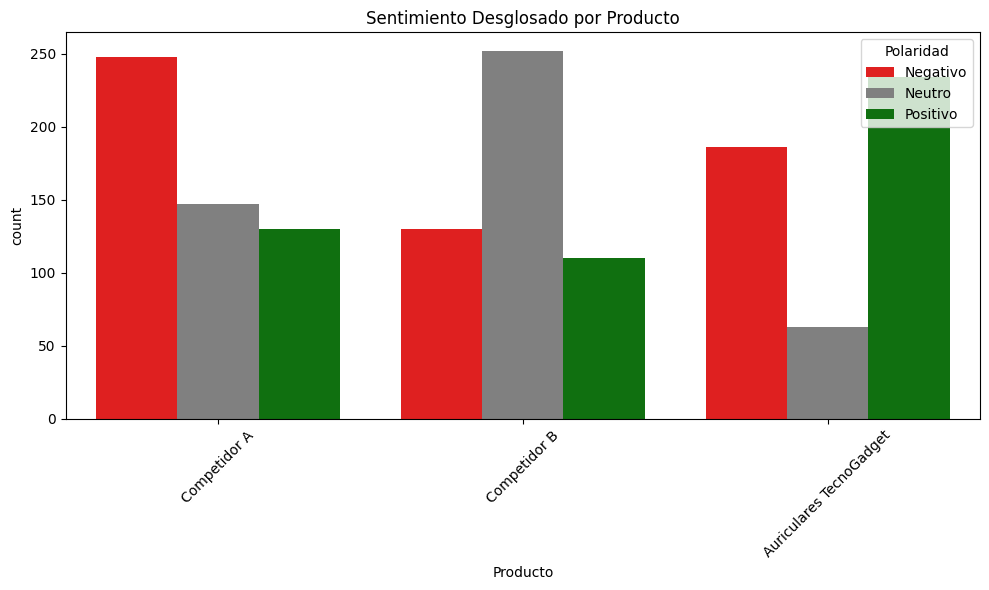

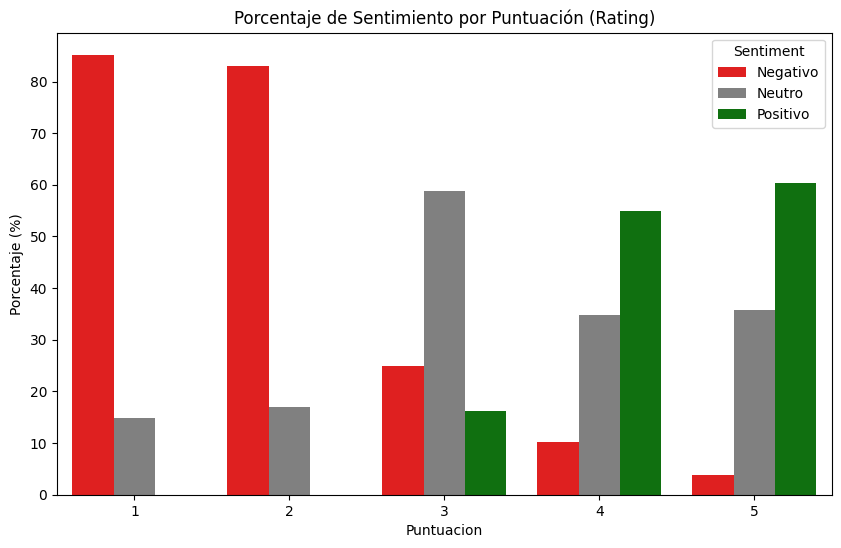

In [ ]:
# --- 1. Instalación y Carga (Ejecutar si no están instalados) ---
# !pip install transformers torch pandas
# Asegúrese de tener una conexión a internet activa para descargar el modelo.

from transformers import pipeline
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 2. Cargar Datos
# Asumiendo que su DataFrame 'df' ya está cargado. Si no, cargue 'Datos.csv':
df = pd.read_csv('Datos.csv')

# 3. Cargar Modelo de Sentimiento para Español
try:
    # Este modelo es uno de los más precisos para español (pysentimiento/robertuito-sentiment-analysis)
    sentiment_pipeline = pipeline(
        "sentiment-analysis",
        model="pysentimiento/robertuito-sentiment-analysis"
    )
    print("Modelo de análisis de sentimiento cargado.")

except Exception as e:
    print(f"ERROR: No se pudo cargar el modelo de sentiment-analysis. {e}")
    print("Por favor, asegúrese de tener las librerías 'transformers' y 'torch' instaladas.")


# 4. Aplicar el Análisis
# Nota: Los modelos de transformers suelen trabajar mejor con el texto original (no lematizado).
results = sentiment_pipeline(df['Texto_Comentario'].tolist())

# 5. Almacenar los Resultados
df['Sentiment_Label'] = [result['label'] for result in results]
df['Sentiment_Score'] = [result['score'] for result in results]

# Mapeo a etiquetas en español
df['Sentiment'] = df['Sentiment_Label'].replace({
    'POS': 'Positivo',
    'NEG': 'Negativo',
    'NEU': 'Neutro'
})

print("\n--- Resultados del Análisis de Sentimiento ---")
print(df[['Texto_Comentario', 'Puntuacion', 'Sentiment']].head())


# 6. Visualización Requerida: Sentimiento por Producto y Rating
# --- A. Sentimiento por Producto (Análisis Competitivo) ---
plt.figure(figsize=(10, 6))
sns.countplot(x='Producto', hue='Sentiment', data=df,
              order=df['Producto'].value_counts().index,
              hue_order=['Negativo', 'Neutro', 'Positivo'],
              palette={'Negativo': 'red', 'Neutro': 'gray', 'Positivo': 'green'})
plt.title('Sentimiento Desglosado por Producto')
plt.xticks(rotation=45)
plt.legend(title='Polaridad')
plt.tight_layout()
plt.show()

# --- B. Sentimiento vs. Puntuación (Validación) ---
sentiment_by_rating = df.groupby('Puntuacion')['Sentiment'].value_counts(normalize=True).mul(100).rename('Percent').reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='Puntuacion', y='Percent', hue='Sentiment', data=sentiment_by_rating,
            hue_order=['Negativo', 'Neutro', 'Positivo'],
            palette={'Negativo': 'red', 'Neutro': 'gray', 'Positivo': 'green'})
plt.title('Porcentaje de Sentimiento por Puntuación (Rating)')
plt.ylabel('Porcentaje (%)')
plt.show()

# Análisis a nivel de aspecto

In [ ]:
import pandas as pd
from collections import defaultdict, Counter

# 1. Preparación y Mapeo de Columnas (Asegurar Nombres)
# Renombrar columnas a nombres estandarizados
df.rename(columns={'Texto_Comentario': 'CommentText',
                   'Puntuacion': 'Rating',
                   'Producto': 'Product',
                   'Fuente': 'Source'}, inplace=True)

# 2. Creación del Sentimiento (Solución Robusta/Fallback)
# Si la columna 'Sentiment' no existe (o está vacía), la creamos usando la Puntuación.
# Esta es una validación para asegurar que el ABSA reciba valores correctos.

if 'Sentiment' not in df.columns or (df['Sentiment'].nunique() <= 1 and df['Rating'].any()):
    print("WARNING: Columna 'Sentiment' no poblada. Usando Rating como Fallback.")

    # Mapeo de Rating a Sentimiento para simular la polaridad:
    def map_rating_to_sentiment(rating):
        if rating in [4, 5]:
            return 'Positivo'
        elif rating in [1, 2]:
            return 'Negativo'
        else:
            return 'Neutro'

    df['Sentiment'] = df['Rating'].apply(map_rating_to_sentiment)

print(f"La columna 'Sentiment' tiene {df['Sentiment'].nunique()} valores únicos.")

# --- PASO 3: Ejecución Corregida del ABSA (Aspecto por Fila) ---
aspect_sentiment_list = []
sentiment_map = {'Positivo': 1, 'Negativo': -1, 'Neutro': 0}

for index, row in df.iterrows():
    # Obtener los lemas (Aspectos)
    lemmas = row.get('processed_tokens', [])

    # Obtener el sentimiento (que ya está validado)
    sentiment = row.get('Sentiment', 'Neutro')

    for lemma in lemmas:
        aspect_sentiment_list.append({
            'Product': row['Product'],
            'Source': row['Source'],
            'Sentiment': sentiment,
            'Aspect': lemma
        })

df_absa = pd.DataFrame(aspect_sentiment_list)

# Filtrar lemas muy cortos (ruido remanente)
df_absa = df_absa[df_absa['Aspect'].str.len() > 2]


# --- PASO 4: Cálculo del Sentimiento Neto por Aspecto ---
df_absa['Sentiment_Value'] = df_absa['Sentiment'].map(sentiment_map)

# Agrupar y calcular el Sentimiento Neto y la Frecuencia
absa_summary = df_absa.groupby(['Product', 'Aspect']).agg(
    Net_Sentiment=('Sentiment_Value', 'sum'),
    Frequency=('Aspect', 'size')
).reset_index()

# Filtrar y Analizar (TecnoGadget S.A.)
MIN_MENTIONS = 10
absa_filtered = absa_summary[absa_summary['Frequency'] >= MIN_MENTIONS]

tecno_gadget_absa = absa_filtered[absa_filtered['Product'] == 'Auriculares TecnoGadget']

# print("\n--- 3 Fortalezas (Aspectos más Positivos) de Auriculares TecnoGadget (CORREGIDO) ---")
# top_positive = tecno_gadget_absa.sort_values(by='Net_Sentiment', ascending=False).head(3)
# print(top_positive[['Aspect', 'Net_Sentiment', 'Frequency']])

# print("\n--- 3 Debilidades (Aspectos más Negativos) de Auriculares TecnoGadget (CORREGIDO) ---")
# top_negative = tecno_gadget_absa.sort_values(by='Net_Sentiment', ascending=True).head(3)
# print(top_negative[['Aspect', 'Net_Sentiment', 'Frequency']])

# --- PASO 5: Análisis de Fortalezas y Debilidades para TODOS los Productos ---

# La variable 'absa_filtered' contiene el resumen ABSA con frecuencia >= 10
products_to_analyze = df['Product'].unique()



for product in products_to_analyze:
    product_absa = absa_filtered[absa_filtered['Product'] == product]

    # Fortalezas (Aspectos más Positivos)
    top_positive = product_absa.sort_values(by='Net_Sentiment', ascending=False).head(3)

    # Debilidades (Aspectos más Negativos)
    top_negative = product_absa.sort_values(by='Net_Sentiment', ascending=True).head(3)

    print(f"\n--- Producto: {product} ---")

    print("\n  >>> TOP 3 FORTALEZAS (Aspectos más Positivos):")
    if not top_positive.empty:
        print(top_positive[['Aspect', 'Net_Sentiment', 'Frequency']])
    else:
        print("    [No se encontraron fortalezas con más de 10 menciones.]")

    print("\n  >>> TOP 3 DEBILIDADES (Aspectos más Negativos):")
    if not top_negative.empty:
        print(top_negative[['Aspect', 'Net_Sentiment', 'Frequency']])
    else:
        print("    [No se encontraron debilidades con más de 10 menciones.]")

La columna 'Sentiment' tiene 3 valores únicos.

--- Producto: Auriculares TecnoGadget ---

  >>> TOP 3 FORTALEZAS (Aspectos más Positivos):
       Aspect  Net_Sentiment  Frequency
46  excelente             55         57
11    calidad             46         76
93     sonido             40         54

  >>> TOP 3 DEBILIDADES (Aspectos más Negativos):
      Aspect  Net_Sentiment  Frequency
86    semana            -18         30
3   ambiente            -17         17
87  sensible            -16         16

--- Producto: Competidor B ---

  >>> TOP 3 FORTALEZAS (Aspectos más Positivos):
         Aspect  Net_Sentiment  Frequency
180        agua             39         39
245  resistente             39         39
219       grave             36         36

  >>> TOP 3 DEBILIDADES (Aspectos más Negativos):
            Aspect  Net_Sentiment  Frequency
191           caro            -32         32
203  decepcionante            -26         26
198        confuso            -25         25

--- Product

# Extraccion de entidades nombradas

In [ ]:
import spacy
from collections import Counter
import pandas as pd
import re

# Asegúrese de que nlp ya está definido como nlp = spacy.load("es_core_news_sm")

# 1. Función para extraer Entidades Nombradas
def extract_entities_from_comment(text):
    """Procesa un texto y devuelve una lista de tuplas (Entidad, Etiqueta)"""
    doc = nlp(str(text))
    # Nos enfocamos en etiquetas clave: ORG (Organizaciones), LOC (Lugares), PER (Personas), MISC (Misceláneos)
    relevant_labels = ['ORG', 'LOC', 'PER', 'MISC']

    # Extraer y filtrar solo etiquetas relevantes
    entities = [(ent.text, ent.label_) for ent in doc.ents if ent.label_ in relevant_labels]

    return entities

# 2. Aplicar la función a la columna original de texto
# El NER funciona mejor con el contexto completo
df['NER_Entities'] = df['CommentText'].apply(extract_entities_from_comment)


# 3. Análisis de Frecuencia de Entidades
all_entities = [ent for sublist in df['NER_Entities'] for ent, label in sublist]
entity_counts = Counter(all_entities)

print("\n--- 20 Entidades Nombradas Más Frecuentes (NER) ---")
# Filtramos entidades que son muy cortas o tienen baja frecuencia (mínimo 5 menciones)
filtered_entities = {ent: count for ent, count in entity_counts.items() if len(ent.split()) > 0 and count >= 5}

top_20_entities = Counter(filtered_entities).most_common(20)

for entity, count in top_20_entities:
    print(f"- {entity}: {count}")

# Guardar el DataFrame actualizado para la Fase 3
df.to_csv('Datos_Fase2_FINAL.csv', index=False)


--- 20 Entidades Nombradas Más Frecuentes (NER) ---
- Sonido: 41
- App: 34
- Conexión: 29
- Precio: 23
- ¿Alguien: 18
- No contestan emails: 18
- bluetooth: 14


### Limpieza ligera del texto debido a que los modelos.
En modelos transformer como el (nlptown/bert-base-multilingual-uncased-sentiment), el preprocesamiento tradicional (como eliminar stopwords o aplicar stemming) puede no ser necesario e incluso perjudicial, ya que estos **modelos están entrenados para entender el contexto completo del texto**.

Dicho esto, ciertos pasos de preprocesamiento pueden ser útiles, como la limpieza de URLs o caracteres especiales muy raros.

In [ ]:
import pandas as pd
from transformers import pipeline
import numpy as np
import re
import unicodedata

# Cargar el modelo de análisis de sentimientos
sentiment_pipeline = pipeline(
    "sentiment-analysis",
    model="nlptown/bert-base-multilingual-uncased-sentiment",
    return_all_scores=False
)

# Leer el archivo CSV
df = pd.read_csv("Datos.csv")

# Función de preprocesamiento ligero
def preprocess_for_sentiment(text):
    if pd.isna(text):
        return text

    # Eliminar URLs
    text = re.sub(r'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\\(\\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+', '', text)

    # Eliminar caracteres especiales manteniendo signos de puntuación básicos
    text = re.sub(r'[^\w\sáéíóúüñ.,;:!?¿¡\-]', ' ', text)

    # Normalizar caracteres unicode
    text = unicodedata.normalize('NFD', text).encode('ascii', errors='ignore').decode('utf-8')

    # Eliminar espacios múltiples
    text = re.sub(r'\s+', ' ', text).strip()

    return text

# Función para clasificar el sentimiento
def classify_sentiment(text):
    if pd.isna(text):
        return {"label": "NEUTRAL", "score": 0.0}

    # Preprocesar el texto
    cleaned_text = preprocess_for_sentiment(text)

    # Obtener resultado del modelo
    result = sentiment_pipeline(cleaned_text)[0]

    # Extraer etiqueta y puntuación
    label = result['label']
    score = result['score']

    # Mapear estrellas a polaridad general
    if "5" in label or "4" in label:
        polarity = "POSITIVE"
    elif "1" in label or "2" in label:
        polarity = "NEGATIVE"
    else:
        polarity = "NEUTRAL"

    return {"label": polarity, "score": score}

# Aplicar la clasificación de sentimientos
print("Calculando sentimientos...")
sentiment_results = df['Texto_Comentario'].apply(classify_sentiment)

# Extraer etiquetas y puntuaciones
df['sentiment_label'] = sentiment_results.apply(lambda x: x['label'])
df['sentiment_score'] = sentiment_results.apply(lambda x: x['score'])

# Mostrar resultados
print("\nResultados de sentimiento:")
for idx, row in df.iterrows():
    print(f"\nID: {row['ID']}")
    print(f"Comentario: {row['Texto_Comentario']}")
    print(f"Sentimiento: {row['sentiment_label']} (Confianza: {row['sentiment_score']:.3f})")

# Análisis de sentimientos
print(f"\nDistribución de sentimientos:")
print(df['sentiment_label'].value_counts())

# Promedio de confianza por tipo de sentimiento
print(f"\nConfianza promedio por sentimiento:")
print(df.groupby('sentiment_label')['sentiment_score'].mean())

/usr/local/lib/python3.12/dist-packages/transformers/pipelines/text_classification.py:111: UserWarning: `return_all_scores` is now deprecated,  if want a similar functionality use `top_k=None` instead of `return_all_scores=True` or `top_k=1` instead of `return_all_scores=False`.
  warnings.warn(


Se han truncado las últimas 5000 líneas del flujo de salida.
Comentario: Muy buenos para deportes
Sentimiento: POSITIVE (Confianza: 0.635)

ID: 255
Comentario: Sonido excelente pero la batería deja mucho que desear
Sentimiento: NEUTRAL (Confianza: 0.568)

ID: 256
Comentario: Audio de alta fidelidad
Sentimiento: POSITIVE (Confianza: 0.596)

ID: 257
Comentario: Cómodos y bonitos, pero conexión inestable
Sentimiento: NEUTRAL (Confianza: 0.462)

ID: 258
Comentario: El estuche de carga se rompió a las dos semanas
Sentimiento: NEGATIVE (Confianza: 0.496)

ID: 259
Comentario: Audio de alta fidelidad
Sentimiento: POSITIVE (Confianza: 0.596)

ID: 260
Comentario: Relación calidad-precio excelente
Sentimiento: POSITIVE (Confianza: 0.490)

ID: 261
Comentario: Llevo un mes esperando respuesta del servicio técnico
Sentimiento: NEGATIVE (Confianza: 0.306)

ID: 262
Comentario: Cancelación de ruido pobre
Sentimiento: NEGATIVE (Confianza: 0.493)

ID: 263
Comentario: Relación calidad-precio excelente
Sen

##Nube de Palabras


--- Análisis de Frecuencias por PRODUCTO ---


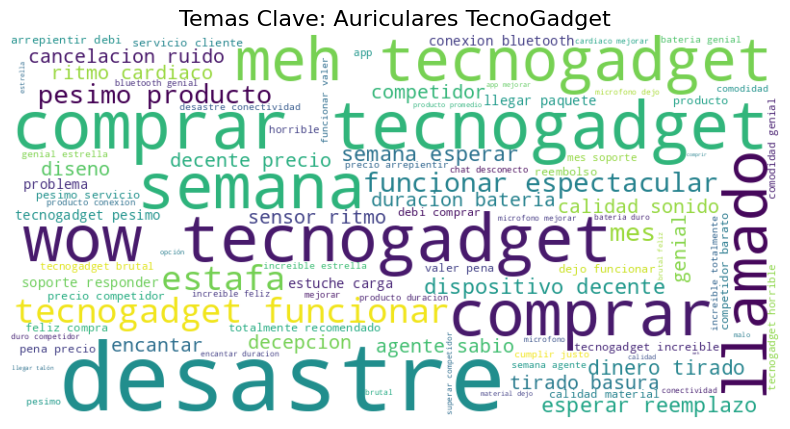


Top 10 Frecuencias para Auriculares TecnoGadget:
- llevar: 167
- tecnogadget: 130
- comprar: 105
- semana: 83
- pesimo: 83
- producto: 76
- competidor: 69
- funcionar: 68
- genial: 65
- desastre: 62


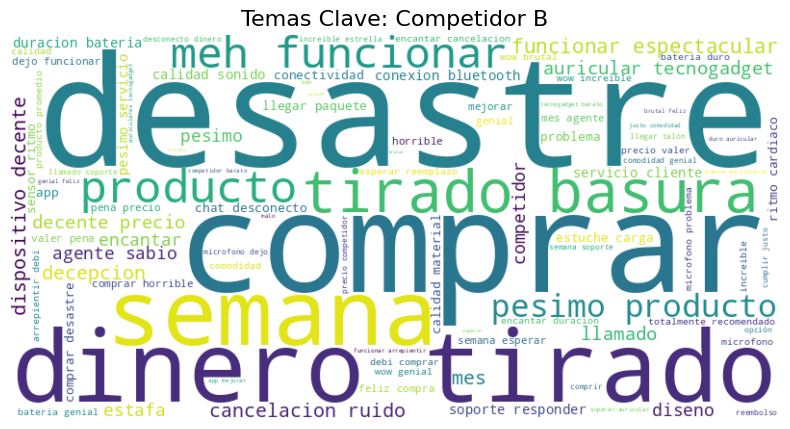


Top 10 Frecuencias para Competidor B:
- llevar: 139
- comprar: 85
- producto: 79
- pesimo: 78
- desastre: 64
- funcionar: 62
- semana: 59
- genial: 49
- encantar: 47
- calidad: 47


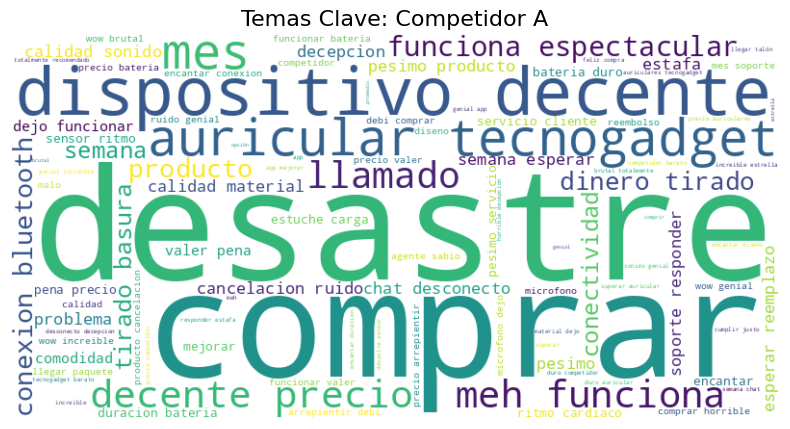


Top 10 Frecuencias para Competidor A:
- llevar: 149
- comprar: 79
- producto: 66
- pesimo: 63
- calidad: 62
- desastre: 62
- semana: 58
- precio: 57
- mes: 54
- genial: 53


--- Análisis de Frecuencias por FUENTE ---


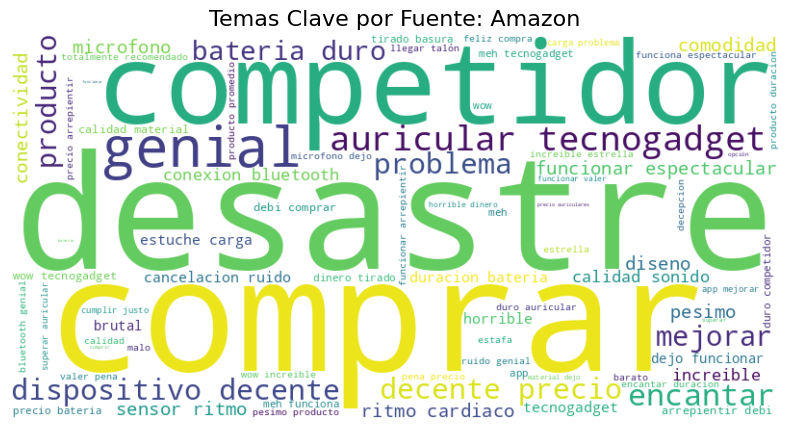


Top 10 Frecuencias para Amazon:
- tecnogadget: 101
- comprar: 81
- competidor: 68
- funcionar: 67
- genial: 65
- desastre: 62
- producto: 58
- calidad: 56
- bateria: 51
- meh: 47


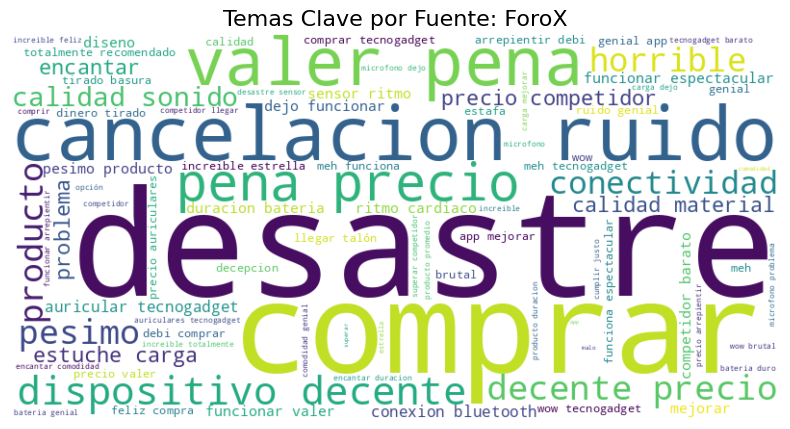


Top 10 Frecuencias para ForoX:
- tecnogadget: 80
- comprar: 78
- competidor: 74
- desastre: 71
- producto: 66
- calidad: 64
- precio: 63
- funcionar: 62
- genial: 60
- pesimo: 50


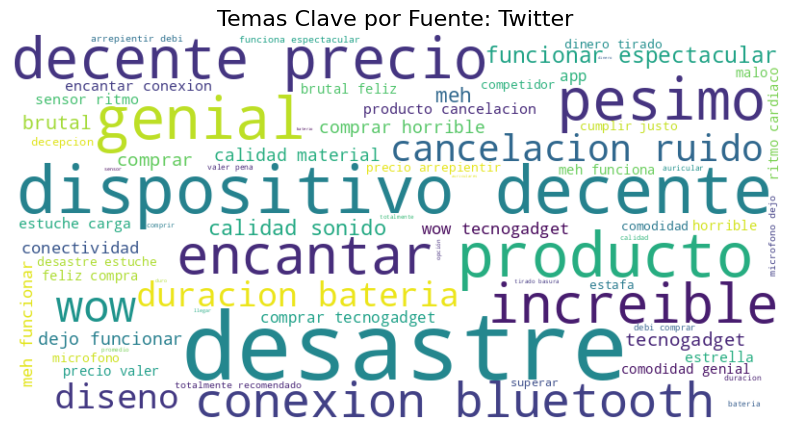


Top 10 Frecuencias para Twitter:
- desastre: 55
- producto: 47
- dispositivo: 44
- decente: 44
- funcionar: 44
- comprar: 44
- genial: 42
- encantar: 40
- tecnogadget: 37
- meh: 37


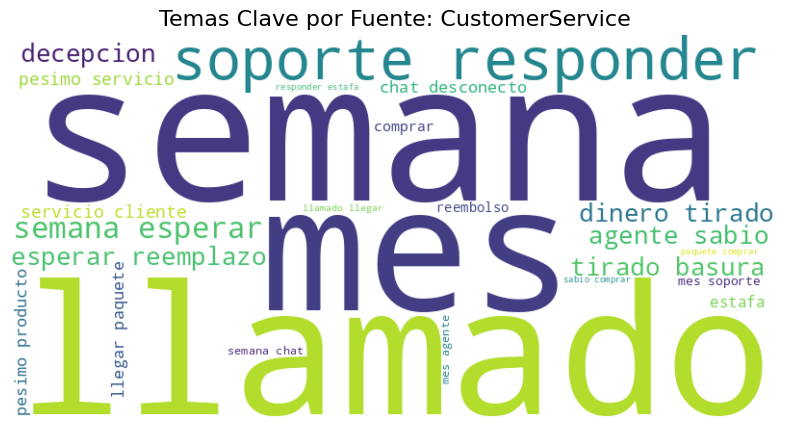


Top 10 Frecuencias para CustomerService:
- llevar: 455
- semana: 200
- mes: 143
- llamado: 112
- pesimo: 106
- soporte: 67
- responder: 67
- comprar: 66
- esperar: 65
- reemplazo: 65


In [ ]:
import pandas as pd
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import unicodedata # Import unicodedata to handle normalization
import spacy
import re

# Load Spanish stopwords
try:
    with open("stopwords.es", encoding="utf-8") as f:
        spanish_stopwords = set(line.strip() for line in f)
except FileNotFoundError:
    print("Error: stopwords.es file not found. Please make sure it's in the correct directory.")
    spanish_stopwords = set() # Use an empty set if stopwords file is not found

# Load spaCy model
try:
    nlp = spacy.load("es_core_news_sm")
except:
    print("Error loading spaCy model. Please ensure 'es_core_news_sm' is downloaded.")
    print("You can download it by running: !python -m spacy download es_core_news_sm")
    nlp = None # Set nlp to None if model loading fails


# Function for text preprocessing
def preprocess_text(text):
    if pd.isna(text):
        return []

    # Normalization: Convert to lowercase
    text = text.lower()

    # Remove URLs
    text = re.sub(r'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\\(\\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+', '', text)

    # Remove special characters and numbers
    text = re.sub(r'[^a-zA-Z\sáéíóúüñ]', ' ', text)

    # Normalize unicode characters to ASCII
    text = unicodedata.normalize('NFD', text).encode('ascii', errors='ignore').decode('utf-8')

    # Process text with spaCy if model is loaded
    if nlp:
        doc = nlp(text)
        # Process tokens
        processed_tokens = []
        for token in doc:
            # Check conditions to include the token
            if (not token.is_stop and  # Not a spaCy stop word
                token.text.lower() not in spanish_stopwords and  # Not a custom stop word
                not token.is_punct and  # Not punctuation
                not token.is_space and  # Not whitespace
                not token.like_num and  # Not a number
                token.text.strip()):  # Not an empty string
                # Lemmatization
                processed_tokens.append(token.lemma_.lower())

        # Handle negations
        processed_tokens = handle_negations(processed_tokens)
        return processed_tokens
    else:
        # If spaCy model failed to load, do basic splitting
        return text.split()


def handle_negations(tokens):
    """
    Detects negation patterns and joins them into a single token
    Example: ["no", "bueno"] -> ["no_bueno"]
    """
    negation_words = {"no", "nunca", "jamás", "ni", "tampoco", "ningún", "ninguna", "nadie", "nada"}
    result = []
    i = 0
    while i < len(tokens):
        if tokens[i] in negation_words and i + 1 < len(tokens):
            # Join the negation with the next word
            negated_token = f"{tokens[i]}_{tokens[i + 1]}"
            result.append(negated_token)
            i += 2  # Skip both tokens
        else:
            result.append(tokens[i])
            i += 1
    return result


# --- 1. Definir la función de Nube de Palabras ---
def create_wordcloud(text_data, title, stopwords_set):
    """Genera y muestra una Nube de Palabras."""
    # Ensure text_data is a series of strings or lists of strings
    # Join the lists of tokens into single strings, handling both list of tokens and strings
    all_text = ' '.join([' '.join(tokens) if isinstance(tokens, list) else str(tokens) for tokens in text_data])


    if not all_text.strip():
        print(f"No hay texto para generar la nube de palabras para: {title}")
        return

    wordcloud = WordCloud(
        width=800,
        height=400,
        background_color='white',
        max_words=100,
        stopwords=stopwords_set # Use the stopwords
    ).generate(all_text)


    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title(title, fontsize=16)
    plt.show()

# --- 2. Segmentación y Análisis por PRODUCTO ---
print("\n--- Análisis de Frecuencias por PRODUCTO ---")
productos = df_final['Product'].unique()

for product in productos:
    # 2.1 Filtrar los datos por producto and apply preprocessing
    filtered_data = df_final[df_final['Product'] == product]['CommentText'].apply(preprocess_text)

    # 2.2 Generar y Mostrar Nube de Palabras
    create_wordcloud(filtered_data, f'Temas Clave: {product}', spanish_stopwords)

    # 2.3 Mostrar Frecuencias (Top 10)
    # Need to flatten the list of lists of tokens for counting
    all_product_tokens = [token for tokens_list in filtered_data for token in tokens_list]

    word_counts = Counter(all_product_tokens)
    top_10 = word_counts.most_common(10)

    print(f"\nTop 10 Frecuencias para {product}:")
    if top_10:
        for word, freq in top_10:
            print(f"- {word}: {freq}")
    else:
        print("No hay palabras frecuentes.")


# --- 3. Segmentación y Análisis por FUENTE (Source) ---
print("\n\n--- Análisis de Frecuencias por FUENTE ---")
fuentes = df_final['Source'].unique()

for source in fuentes:
    # 3.1 Filtrar los datos por fuente and apply preprocessing
    filtered_data = df_final[df_final['Source'] == source]['CommentText'].apply(preprocess_text)

    # 3.2 Generar y Mostrar Nube de Palabras
    create_wordcloud(filtered_data, f'Temas Clave por Fuente: {source}', spanish_stopwords)

    # 3.3 Mostrar Frecuencias (Top 10)
    # Need to flatten the list of lists of tokens for counting
    all_source_tokens = [token for tokens_list in filtered_data for token in tokens_list]
    word_counts = Counter(all_source_tokens)
    top_10 = word_counts.most_common(10)

    print(f"\nTop 10 Frecuencias para {source}:")
    if top_10:
        for word, freq in top_10:
            print(f"- {word}: {freq}")
    else:
         print("No hay palabras frecuentes.")